# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.com)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part I: Classic Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format  # this is kind of horrible at the moment...

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  24 of 24 completed


In [2]:
data.head()

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,3960.0574%,3520.9469%,5852.6051%,2536.0292%,1493.4148%,4434.7641%,6895.5734%,4611.3335%,978.5186%,2569.0828%,...,5000.6744%,3119.5107%,1681.2901%,3968.4479%,20577.8809%,3989.2883%,6280.0835%,4112.5080%,3673.0564%,2406.1127%
2016-01-05,3879.8401%,3535.1543%,5967.8581%,2536.4849%,1507.3106%,4451.0754%,6935.4507%,4619.8830%,987.7976%,2538.3738%,...,5023.4879%,3133.4784%,1707.9905%,3969.2886%,21158.9157%,4028.2162%,6390.2309%,4122.4178%,3723.5050%,2379.9892%
2016-01-06,3434.1885%,3543.6798%,5863.0836%,2516.8861%,1488.5101%,4443.3498%,6857.5043%,4566.0648%,952.3685%,2514.1294%,...,4932.2346%,2950.9640%,1717.4652%,3970.1305%,21192.5964%,3965.1890%,6325.3376%,3998.5466%,3689.8659%,2310.6249%
2016-01-07,3257.7091%,3484.9506%,5700.6805%,2489.0827%,1459.0836%,4389.1113%,6796.7781%,4448.8705%,908.5038%,2450.2857%,...,4760.6789%,2876.4677%,1679.5671%,3849.7986%,20971.9757%,3840.0600%,6308.2607%,3916.2971%,3669.5995%,2241.2613%
2016-01-08,3266.6241%,3429.0634%,5555.7400%,2491.8180%,1455.8134%,4414.1579%,6685.2974%,4451.3863%,892.4764%,2446.2452%,...,4775.2792%,2870.8811%,1676.9833%,3806.0413%,20818.7149%,3834.4982%,6094.7964%,3871.7037%,3633.9329%,2216.0379%


In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.1854%,0.9483%,-1.1953%,...,0.4562%,0.4478%,1.5881%,0.0212%,2.8236%,0.9758%,1.7539%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-1.1649%,-3.5867%,-0.9551%,...,-1.8165%,-5.8247%,0.5547%,0.0212%,0.1592%,-1.5646%,-1.0155%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-2.5666%,-4.6059%,-2.5394%,...,-3.4783%,-2.5245%,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-0.2700%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2737%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,0.0565%,-1.7642%,-0.1649%,...,0.3067%,-0.1942%,-0.1538%,-1.1366%,-0.7308%,-0.1448%,-3.3839%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5287%,-0.0565%,0.6616%,0.0330%,...,-0.0573%,-5.9682%,1.6435%,0.0000%,0.9869%,-0.1450%,1.4570%,-0.4607%,0.5800%,-1.9918%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)
# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\cvxpy\problems\problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,8.8122%,0.0000%,0.0000%,8.9084%,0.0000%,4.3662%,11.8441%,0.0000%,0.0000%,...,15.5040%,0.0000%,9.6324%,0.0000%,0.0000%,0.0000%,7.0719%,0.0000%,3.3377%,0.0000%


### 2.2 Plotting portfolio composition

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:442: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts = ax.pie(


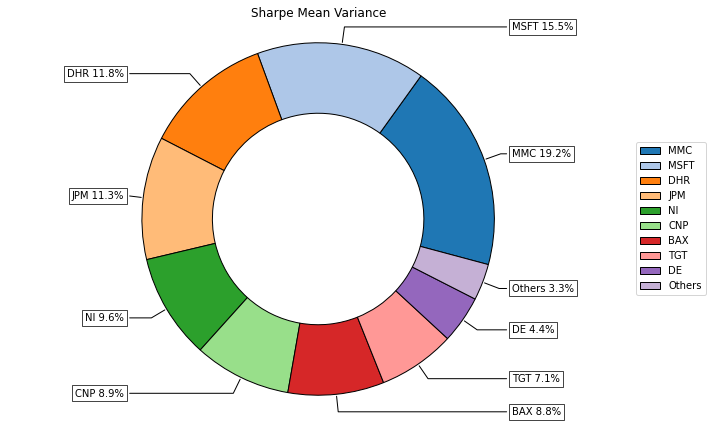

In [5]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,4.8244%,4.5306%,3.1462%,7.1941%,3.3692%,0.3881%,0.7824%,0.0000%,3.0984%,...,0.0000%,0.0852%,11.4528%,0.0000%,14.6890%,0.1807%,4.1222%,0.0001%,11.6398%,0.3266%
1,0.0000%,8.1320%,0.0000%,2.1722%,9.4929%,1.7473%,2.2408%,4.7114%,0.0000%,0.9650%,...,2.2538%,0.0000%,13.7083%,0.0000%,6.7636%,0.0000%,6.0055%,0.0000%,11.3735%,0.0000%
2,0.0000%,8.7663%,0.0000%,1.0029%,10.2660%,0.7607%,2.6616%,6.4505%,0.0000%,0.0000%,...,5.1480%,0.0000%,14.5329%,0.0000%,2.1553%,0.0000%,6.6427%,0.0000%,10.9235%,0.0000%
3,0.0000%,8.9332%,0.0000%,0.0000%,10.1975%,0.0000%,3.1372%,8.3255%,0.0000%,0.0000%,...,8.6284%,0.0000%,13.5807%,0.0000%,0.0000%,0.0000%,6.9300%,0.0000%,8.9178%,0.0000%
4,0.0000%,8.8621%,0.0000%,0.0000%,9.5327%,0.0000%,3.7757%,10.1574%,0.0000%,0.0000%,...,12.2055%,0.0000%,11.5206%,0.0000%,0.0000%,0.0000%,7.0056%,0.0000%,5.9959%,0.0000%


C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.4%}".format(x) for x in ax.get_yticks()])
C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:320: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.4%}".format(x) for x in ax.get_xticks()])


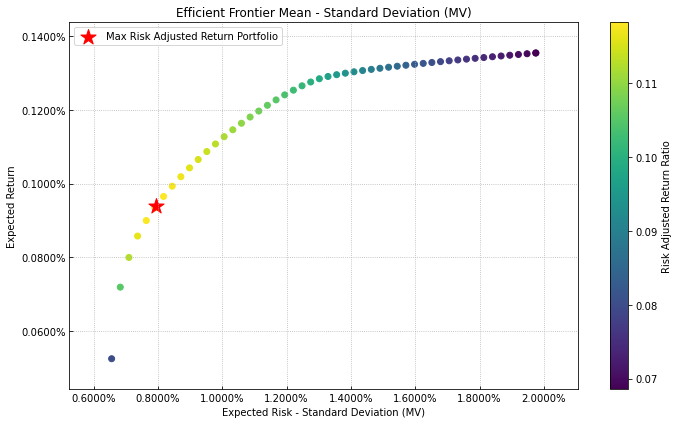

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2%}".format(x) for x in ax.get_yticks()])


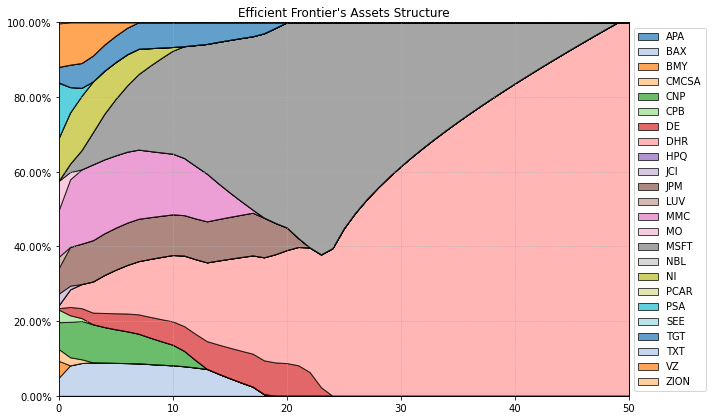

In [8]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Mean Risk Portfolios

In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.

### 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

In [9]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,12.8313%,0.0000%,0.0000%,63.4974%,0.0000%,0.0000%,...,6.6035%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,17.0677%,0.0000%,0.0000%,0.0000%


### 3.2 Plotting portfolio composition

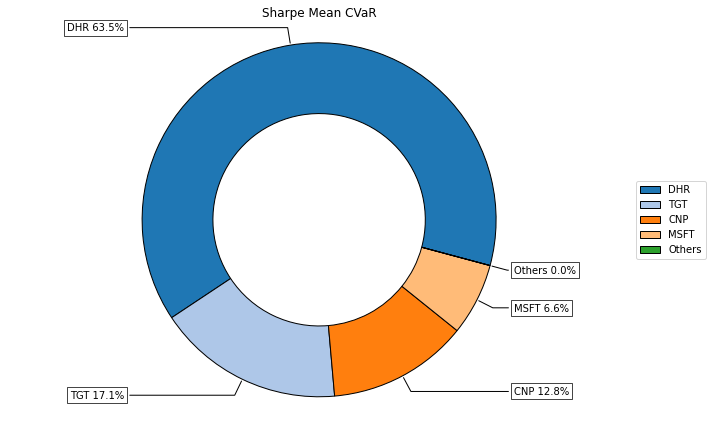

In [10]:
ax = plf.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [11]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\cvxpy\problems\problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,0.0000%,14.8019%,0.0000%,0.0000%,13.9838%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,30.0309%,0.0000%,10.4572%,0.0000%,10.8743%,0.0000%
1,0.0000%,0.0000%,7.3439%,7.7635%,0.4605%,14.8809%,0.0000%,2.8049%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,27.7220%,0.0000%,11.1804%,0.0000%,6.6347%,0.0000%
2,0.0000%,0.0000%,4.9450%,8.0758%,0.0000%,14.7476%,0.0000%,4.4821%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,25.0560%,0.0000%,10.3334%,0.0000%,6.6166%,0.0000%
3,0.0000%,0.0000%,2.0883%,7.6413%,0.0000%,14.5514%,0.0000%,6.5655%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,22.1473%,0.0000%,9.3112%,0.0000%,10.5775%,0.0000%
4,0.0000%,0.0000%,0.0000%,6.0517%,0.0000%,13.6393%,0.0000%,9.9613%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,19.1135%,0.0000%,9.0655%,0.0000%,14.5568%,0.0000%


C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.4%}".format(x) for x in ax.get_yticks()])
C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:320: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.4%}".format(x) for x in ax.get_xticks()])


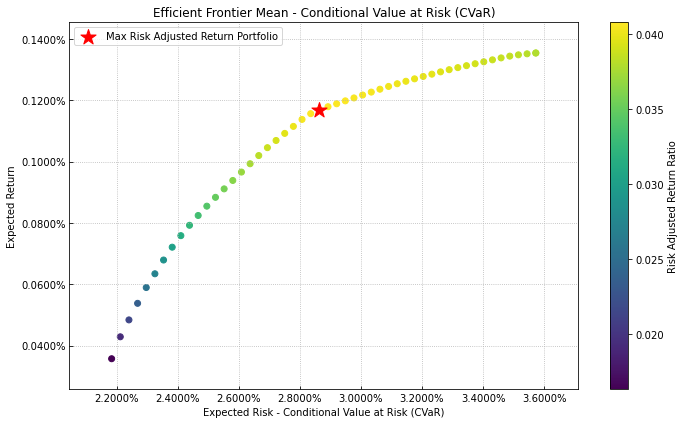

In [12]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:3.2%}".format(x) for x in ax.get_yticks()])


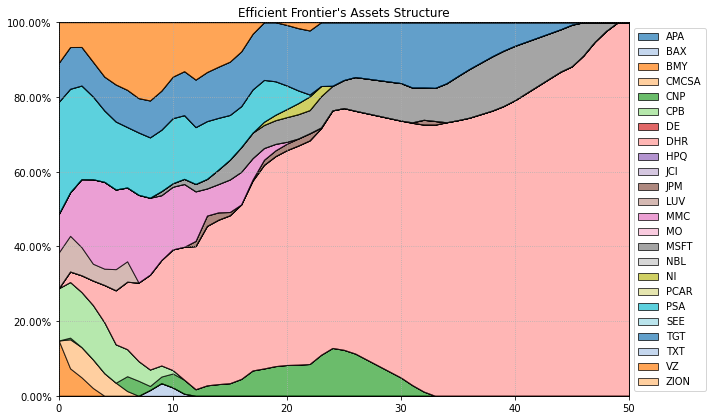

In [13]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [14]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\cvxpy\problems\problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [15]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,8.81%,3.24%,11.75%,1.29%,0.00%,0.00%,0.00%,0.00%,0.55%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.91%,4.78%,8.69%,6.83%,7.48%,12.83%,0.00%,27.32%,12.54%,28.29%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,14.34%,0.00%,0.00%,0.00%
DE,4.37%,1.52%,6.79%,0.35%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,11.84%,41.59%,7.29%,46.07%,55.20%,63.50%,15.28%,72.68%,22.55%,49.46%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

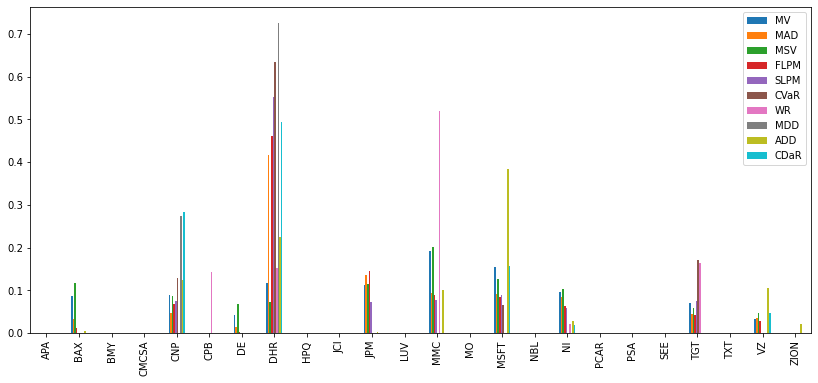

In [16]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4. Constraints on Assets and Assets Classes

### 4.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [20]:
import riskfolio.ConstraintsFunctions as cf

asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','NBL','APA','MMC',
                            'JPM','ZION','PSA','BAX','BMY','LUV','PCAR',
                            'TXT','DHR','DE','MSFT','HPQ','SEE','VZ','CNP','NI'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Industrials','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities'] }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [21]:
A, B = cf.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [22]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\cvxpy\problems\problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,10.0000%,0.0000%,1.5106%,10.0000%,0.0000%,9.3074%,10.0000%,0.0000%,0.0000%,...,10.0000%,0.0000%,10.0000%,0.0000%,0.0000%,0.0000%,9.1840%,0.0000%,9.9980%,0.0000%


C:\Users\joe\Anaconda3\envs\stochastic-finance\lib\site-packages\riskfolio\PlotFunctions.py:442: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts = ax.pie(


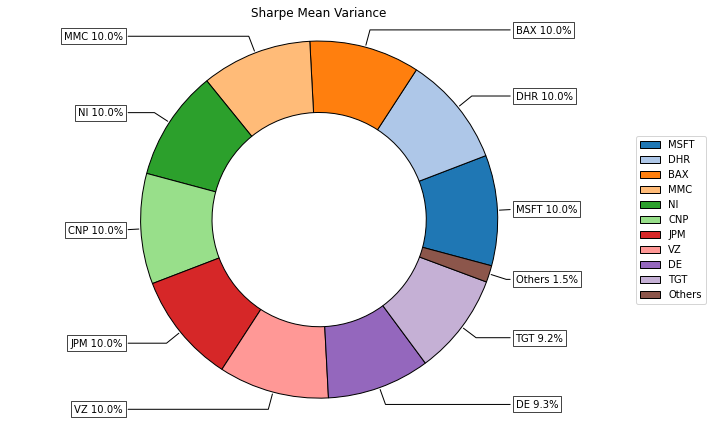

In [23]:
ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

In [24]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
Assets,,
APA,Energy,0.0000%
BAX,Health Care,10.0000%
BMY,Health Care,0.0000%
CMCSA,Consumer Discretionary,1.5106%
CNP,Utilities,10.0000%
CPB,Consumer Staples,0.0000%
DE,Industrials,9.3074%
DHR,Industrials,10.0000%
HPQ,Information Technology,0.0000%


In [25]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,10.6946%
Consumer Staples,0.0000%
Energy,0.0000%
Financials,20.0000%
Health Care,10.0000%
Industrials,19.3074%
Information Technology,10.0000%
Materials,0.0000%
Telecommunications Services,9.9980%


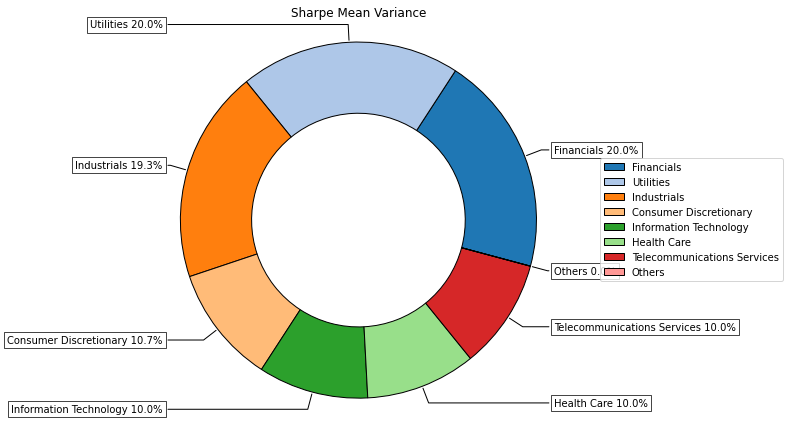

In [26]:
ax = plf.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                  cmap = "tab20", height=6, width=10, ax=None)